# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Uniform-random" data-toc-modified-id="Uniform-random-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uniform random</a></div><div class="lev2 toc-item"><a href="#Linear-congruential-generator" data-toc-modified-id="Linear-congruential-generator-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linear congruential generator</a></div><div class="lev1 toc-item"><a href="#Monete-Carlo-Integeration" data-toc-modified-id="Monete-Carlo-Integeration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Monete Carlo Integeration</a></div><div class="lev2 toc-item"><a href="#Integrate-int_{0}^1-x^2-dx" data-toc-modified-id="Integrate-int_{0}^1-x^2-dx-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Integrate $\int_{0}^1 x^2 dx$</a></div><div class="lev2 toc-item"><a href="#Integrate-int_{1}^3-x^2+x-dx-=-12.67" data-toc-modified-id="Integrate-int_{1}^3-x^2+x-dx-=-12.67-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Integrate $\int_{1}^3 x^2+x dx = 12.67$</a></div><div class="lev2 toc-item"><a href="#Integrate-int_0^1-\int_0^1-\big-(4x^2-y+-y^2)dx-dy-=-1" data-toc-modified-id="Integrate-int_0^1-\int_0^1-\big-(4x^2-y+-y^2)dx-dy-=-1-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Integrate $\int_0^1 \int_0^1 \big (4x^2 y+ y^2)dx dy = 1$</a></div><div class="lev2 toc-item"><a href="#Inverse-transform-exponential-distribution" data-toc-modified-id="Inverse-transform-exponential-distribution-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Inverse transform exponential distribution</a></div><div class="lev2 toc-item"><a href="#Acceptance-Rejection-Algorithm" data-toc-modified-id="Acceptance-Rejection-Algorithm-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Acceptance Rejection Algorithm</a></div><div class="lev3 toc-item"><a href="#beta-f(x)" data-toc-modified-id="beta-f(x)-251"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>beta f(x)</a></div>

In [5]:
import numpy as np

In [21]:
import matplotlib.pyplot as plt

# Uniform random

简述一种产生，随机整数，随机[0,1] 的算法

## Linear congruential generator

$Z_i = (a Z_{i-1} + b) \text{ mod } m $

note:
easiest
- m is prime number
- a, b are both 0

In [ ]:
def randint(seed, m=9):
    Z_i = seed
    while True:
        yield Z_i % m

- 注意的问题是周期，最后怎么会重复，因为其实这些都是pseudo-random


# Monete Carlo Integeration

$ X = \int_{0}^{1} f(x) dx $

In [2]:
def f(x):
    return x*x

## Integrate $\int_{0}^1 x^2 dx$

In [14]:
N = 100000

data = np.random.uniform(0,1, (N,))

integration = f(data).mean()

integration

0.33484043870837843

## Integrate $\int_{1}^3 x^2+x dx = 12.67$

Note: 
- here the range is [a,b], so pdf is 1/(b-a), when we simulate, we are actually doing $\int_1^3 \frac{1}{3-1}(x^2+x) dx$, so we need to add back the constant.
- instead, we could, start with [0,1] random, so the question is, what is the relationship between uniform $Z$ and $X\sim U(1,3)$? ans:
$2*Z+1 = X$, thus, the integration becomes $\int_0^1 \bigg (2z+1)^2 + (2z+1) \bigg) d(2z+1) = 2  * \int_0^1 \bigg (2z+1)^2 + (2z+1) \bigg) $

In sum, I prefer the first way..

    

In [23]:
def f2(x):
    return x*x+x

Method-1

In [36]:
N = 1000
low, high = 1, 3
data = np.random.uniform(low, high, (N,))

integration = (high-low)*f2(data).mean()

integration

12.673452253204148

Method-2

In [48]:
N = 1000
low, high = 1, 3
data = np.random.uniform(0, 1, (N,))
data_prime = data*(high-low) + low
integration2 = (high-low)*f2(data_prime).mean()

integration2

12.471413519191664

## Integrate $\int_0^1 \int_0^1 \big (4x^2 y+ y^2)dx dy = 1$

In [66]:
N = 1000
data = np.random.uniform(0,1, size=(N, 2))

In [79]:
def f(x):
    return 4*x[:,0]**2*x[:, 1] + x[:,1]**2

# note, for a 2-d numpy array, how to extract a column? x[:, 0], 
# note it's not x[:][0], the later x[:] returns a complete 2d-matrix, then x[:][0] extract first row.

In [80]:
f(data).mean()

0.9957396321946322

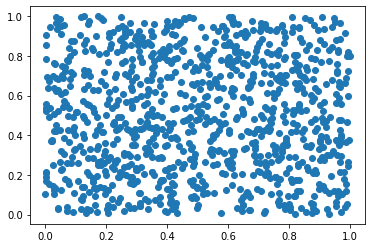

In [81]:
plt.scatter([x[0] for x in data], [x[1] for x in data])

## Inverse transform exponential distribution


$Exp(x) = \lambda e^{-\lambda x}, x>0$

In [84]:
from scipy.stats import norm

In [88]:
# use norm.ppf()

In [96]:
N = 10000

In [97]:
data = np.random.uniform(0,1, size=(N,))

In [98]:
x = norm.ppf(data)

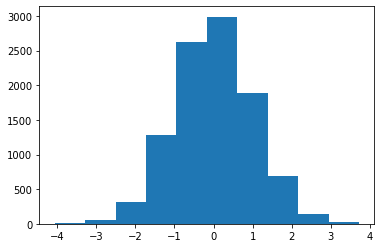

In [100]:
plt.hist(x)
plt.show()

## Acceptance Rejection Algorithm

- $x\sim f(x)$
- $y\sim g(y)$
- find $a$ so that $f(x)/g(x) < a$.

Generate $Y=y_i$, 
- if $ f(y_i) < a \cdot g(y_i)$ reject
- else accept

Note:
- f(x) and g(x) must have same ranges for x; e.g., you cannot use $U(0,1)$ to generate normal, since they have different ranges. But can try it with exponential

### beta f(x)

In [105]:
import math

In [136]:
from scipy.stats import beta

In [162]:
def f(x):
    return 60*x**3*(1-x)**2
    

In [163]:
x = np.linspace(0, 1.0, 100)
a, b = 4, 3
#y = beta.pdf(x, a, b)
y = f(x)

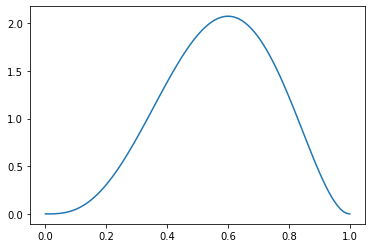

In [164]:
plt.plot(x, y)

In [129]:
import random

In [167]:
N = 10000
data = []
c = 3
for i in range(N):
    Y = random.uniform(0,1)
    U = random.uniform(0,1)
    if beta.pdf(Y, a,b )/c < U :
        continue
    else:
        data.append(Y)

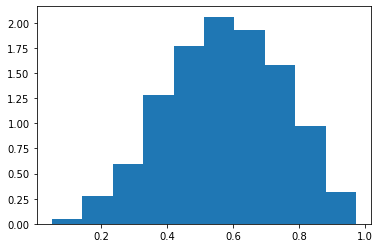

In [168]:
plt.hist(data, density=True)
plt.show()

In [170]:
%pwd

'/Users/junsu/Dropbox/workspace/2022_python'